In [23]:
# Rahmat Hidayat
# hrahmat950@gmail.com

In [1]:
import scipy
print(scipy.__version__)

1.8.0


In [2]:
!npm install @tensorflow/tfjs
!pip install tensorflow==2.18.0


up to date, audited 67 packages in 3s

10 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities


In [3]:
# %pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

c:\Users\hrahm\OneDrive\Documents\machine learning doing\rice image classification\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\hrahm\.cache\kagglehub\datasets\muratkokludataset\rice-image-dataset\versions\1


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import os

dataset_path = r"C:\Users\hrahm\.cache\kagglehub\datasets\muratkokludataset\rice-image-dataset\versions\1\Rice_Image_Dataset"

# Cek isi direktori Rice_Image_Dataset
print("Isi folder 'Rice_Image_Dataset':")
print(os.listdir(dataset_path))


Isi folder 'Rice_Image_Dataset':
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag', 'Rice_Citation_Request.txt']


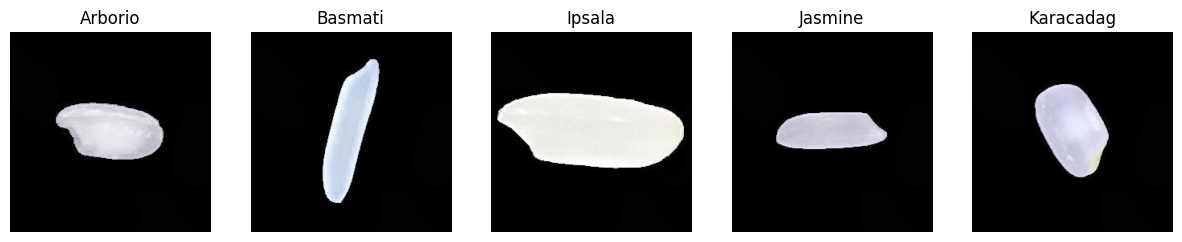

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import os

dataset_path = r"C:\Users\hrahm\.cache\kagglehub\datasets\muratkokludataset\rice-image-dataset\versions\1\Rice_Image_Dataset"

# Ambil daftar kelas (hanya folder, bukan file)
image_classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Buat plot
fig, axes = plt.subplots(1, len(image_classes), figsize=(15, 5))

for i, class_name in enumerate(image_classes):
    class_path = os.path.join(dataset_path, class_name)
    
    # Ambil satu gambar dari kelas tersebut
    image_file = os.listdir(class_path)[0]  # Ambil gambar pertama
    image_path = os.path.join(class_path, image_file)

    # Tampilkan gambar
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(class_name)

plt.show()


In [7]:
base_dir = r"C:\Users\hrahm\.cache\kagglehub\datasets\muratkokludataset\rice-image-dataset\versions\1\Rice_Image_Dataset"
#base dir harus memastikan bahwa data sesuai aktual pada deskripsi website

In [34]:
from PIL import Image
import os

def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):  # Check if it is a directory
            image_files = os.listdir(subdir_path)
            num_images = len(image_files)
            print(f"{subdir}: {num_images}")
            total_images += num_images

            for img_file in image_files:
                img_path = os.path.join(subdir_path, img_file)
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)

    for size in unique_sizes:
        print(f"- {size}")
    print("----------------")
    print(f"\nTotal: {total_images}")

# Contoh pemanggilan fungsi
print_images_resolution(base_dir)


Arborio: 15000
Basmati: 15000
Ipsala: 15000
Jasmine: 15000
Karacadag: 15000
- (250, 250)
----------------

Total: 75000


In [8]:
%pip install tensorflow --upgrade

import tensorflow as tf
print(tf.__version__)


Note: you may need to restart the kernel to use updated packages.
2.10.0


c:\Users\hrahm\OneDrive\Documents\machine learning doing\rice image classification\.venv\Scripts\python.exe: No module named pip


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat ImageDataGenerator untuk augmentasi dan preprocessing gambar pada data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # 20% untuk test set, 80% untuk training set
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Membuat ImageDataGenerator untuk preprocessing gambar pada data validasi
valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # 20% untuk test set, 80% untuk training set
)

# Menyediakan generator data untuk training
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Untuk multiple classes
    subset='training',  # set sebagai data training
    shuffle=True
)

# Menyediakan generator data untuk validasi
validation_generator = valid_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Untuk multiple classes
    subset='validation',  # set sebagai data validation
    shuffle=False
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [10]:
import tensorflow as tf

# Membangun model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')  # Ubah jumlah unit output ke 5
])

# Kompilasi model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callback untuk menghentikan pelatihan jika waktu melebihi 30 menit
import time

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        if time.time() - self.start_time > 30 * 60:  # 30 menit
            self.model.stop_training = True

time_callback = TimeHistory()

# Melatih model dengan data yang sudah disiapkan
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    callbacks=[time_callback]
)

# Menyimpan model yang sudah dilatih
model.save('dataset_rice.h5')


Epoch 1/25
1875/1875 [==============================] - 960s 512ms/step - loss: 0.3294 - accuracy: 0.8693 - val_loss: 0.0820 - val_accuracy: 0.9721
Epoch 2/25
1875/1875 [==============================] - 1028s 548ms/step - loss: 0.1007 - accuracy: 0.9660 - val_loss: 0.0325 - val_accuracy: 0.9903


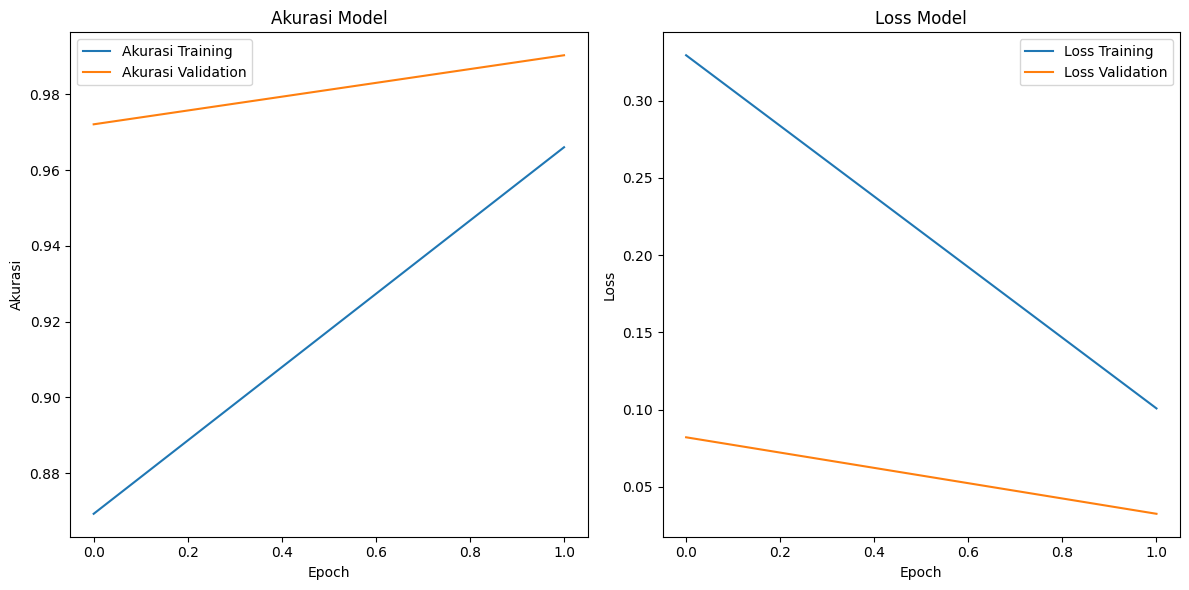

In [11]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.figure(figsize=(12, 6))

# Akurasi pelatihan
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Loss pelatihan
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


In [12]:
# Menyimpan model ke format SavedModel
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [13]:
import tensorflow as tf

# Memuat model dari format SavedModel
loaded_model = tf.keras.models.load_model('saved_model/my_model')

# Menampilkan ringkasan model
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
import os

# Memeriksa apakah direktori model ada
if os.path.exists('saved_model/my_model'):
    print("Direktori model ditemukan.")
    print("Isi direktori:")
    print(os.listdir('saved_model/my_model'))
else:
    print("Direktori model tidak ditemukan.")


Direktori model ditemukan.
Isi direktori:
['assets', 'keras_metadata.pb', 'saved_model.pb', 'variables']


In [15]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
import tensorflow as tf

# Memuat model yang telah disimpan
model = tf.keras.models.load_model('saved_model/my_model')

# Membuat converter TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Mengonversi model ke format TF-Lite
tflite_model = converter.convert()

# Menyimpan model TF-Lite ke file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\hrahm\AppData\Local\Temp\tmpghrlkk0w\assets


INFO:tensorflow:Assets written to: C:\Users\hrahm\AppData\Local\Temp\tmpghrlkk0w\assets


In [17]:
import tensorflow as tf;
print(tf.__version__)

2.10.0


In [18]:
%pip uninstall tensorflow

Note: you may need to restart the kernel to use updated packages.


c:\Users\hrahm\OneDrive\Documents\machine learning doing\rice image classification\.venv\Scripts\python.exe: No module named pip


In [19]:
!pip install tensorflowjs

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
black 24.4.2 requires packaging>=22.0, but you have packaging 20.9 which is incompatible.
conda 24.5.0 requires packaging>=23.0, but you have packaging 20.9 which is incompatible.
jupyterlab-server 2.25.1 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
jupyter-server 2.14.1 requires packaging>=22.0, but you have packaging 20.9 which is incompatible.
pytoolconfig 1.2.6 requires packaging>=22.0, but you have packaging 20.9 which is incompatible.
scikit-image 0.23.2 requires packaging>=21, but you have packaging 20.9 which is incompatible.
sphinx 7.3.7 requires packaging>=21.0, but you have packaging 20.9 which is incompatible.
statsmodels 0.14.2 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xarray 2023.6.0 requires packaging>=21.3, but you have packaging 20


  Using cached tensorflowjs-4.22.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached flax-0.10.4-py3-none-any.whl.metadata (11 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached jax-0.5.2-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.1-cp312-cp312-win_amd64.whl.metadata (1.0 kB)
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     --------------------------------------- 0.0/15.2 MB 653.6 kB/s eta 0:00:24
     --------------------------------------- 0.1/15.2 MB 825.8 kB/s eta 0:00:19
     --------------------------------------- 0.1/15.2 MB 939.4 kB/s eta 0:00:17
     --------------------------------------- 0.1/15.2 MB 722.1 kB/s eta 0:00:21
     --------------------------------------- 0.1/15.2 MB 722.1 kB/s eta 0:00:21
     --------------------------------------- 0.2/15.2 MB 541.0 kB/s eta 0:00:28
     --------------------------------------

In [20]:
!tensorflowjs_converter --version

2025-03-15 06:21:06.391720: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-15 06:21:08.929260: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
C:\Users\hrahm\anaconda3\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hrahm\anaconda3\Scripts\tensorflowjs_convert

In [21]:
!tensorflowjs_converter --input_format=keras dataset_rice.h5 tfjs_model

2025-03-15 06:21:18.552996: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-15 06:21:20.055280: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
C:\Users\hrahm\anaconda3\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hrahm\anaconda3\Scripts\tensorflowjs_convert

In [43]:
# Generate requirements.txt
!pip install pipreqs


# Infrence Testing

In [45]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model(r'C:\Users\hrahm\OneDrive\Documents\machine learning doing\rice image classification\dataset_rice.h5')

# Function to make predictions on a single image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust target_size as per your model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image if required by your model

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_labels = ['Arborio', 'Basmati', 'Ipsala','Jasmine','Karacadag']  # Replace with your actual class labels
    predicted_label = class_labels[class_idx]

    return predicted_label

# Test the function with an example image
test_image_path = './test_model.png'  # Replace with the path to your test image
predicted_label = predict_image(test_image_path)
print(f'The predicted label for the test image is: {predicted_label}')

1/1 [==============================] - 0s 192ms/step
The predicted label for the test image is: Arborio


In [46]:
# Test the function with an example image
test_image_path = './test_model_two.png'  # Replace with the path to your test image
predicted_label = predict_image(test_image_path)
print(f'The predicted label for the test image is: {predicted_label}')

1/1 [==============================] - 0s 50ms/step
The predicted label for the test image is: Basmati
